In [1]:
# Imports
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from scipy.stats import linregress
from BayesianNamingGame import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
folder = '../../results/BNG02'
name = 'BNG02'

* Perhaps save plot data in folder?

In [4]:
# Prepare....
fn = folder + '/BNG02-run-{:0>4}'
div_df, stats_df, divs = analyze_BNG_simulation_runs(fn, 1, burn=1000)

# Save
stats_df.to_csv(os.path.join(folder, name+'-stats.csv'))
div_df.to_csv(os.path.join(folder, name+'-mean-divs.csv'))
np.save(os.path.join(folder, name+'-divs.npy'), divs)

Starting with BNG02-run-0001


In [5]:
# Load all data
div = np.load(os.path.join(folder, name+'-divs.npy'))
setup = json.load(open(os.path.join(folder, 'BNG02-run-0001/BNG02-run-0001-params.json'), 'r'))

In [6]:
# Load divergences into separate variables
jsd_phis = div[:,:,0]
jsd_alpha_mphi = div[:,:,1]
entropy_mphi = div[:,:,2]
jsd_alpha_phis = div[:,:,3]

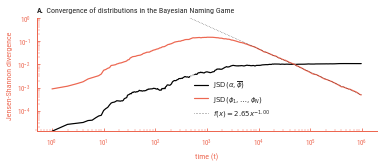

In [8]:
# Plot
figure(figsize=cm2inch(12,4))

# Settings
runs = 20
xs = setup['datapoints']

# JSD(alpha, mean(phi))
l, = pyplot.loglog(xs, jsd_alpha_mphi.mean(axis=0), lw=1.2,
              label=r'$\mathsf{JSD}(\alpha, \overline{\phi})$')
pyplot.loglog(xs, jsd_alpha_mphi[:runs,:].T, color=l.get_color(),
              lw=0.2, alpha=.2);

# JSD(phi_1, ... phi_N)
l, = pyplot.loglog(xs, jsd_phis.mean(axis=0), lw=1.2,
              label=r'$\mathsf{JSD}(\phi_1, \dots, \phi_N)$')
pyplot.loglog(xs, jsd_phis[:runs,:].T, color=l.get_color(),
              lw=0.2, alpha=.3);


# Linear regression line
start = 200
res = linregress(log10(xs[start:]), log10(jsd_phis.mean(axis=0))[start:])
pyplot.loglog(xs, xs**res.slope * 10**res.intercept, 'k', dashes=(1,2), lw=.5,
              label=r'$f(x) = {a:.2f}x^{{{k:.2f}}}$'.format(a=res.intercept, k=res.slope))

# # Intersection
# mthetas = thetas.mean(axis=0)
# idx = np.argwhere(np.diff(np.sign(mthetas - alpha_th.mean(axis=0))) != 0).reshape(-1) + 0
# x,y = xs[idx[0]], mthetas[idx[0]]
# plot(x, y, 'ko', ms=5)
# gca().annotate(r'$t_{\mathrm{int}}$', xy=(x,y),  xycoords='data',
#             xytext=(x+10,y+0.01), textcoords='data',
#             horizontalalignment='left', verticalalignment='bottom', fontsize=9)

# # Maximum
# x, y = xs[mthetas.argmax()], mthetas[mthetas.argmax()]
# plot(x, y, 'ko', ms=5)
# gca().annotate(r'$t_{\mathrm{max}}$', xy=(x,y),  xycoords='data',
#             xytext=(x+5,y-.03), textcoords='data',
#             horizontalalignment='right', verticalalignment='top',
#               fontsize=9)

# Format
legend(bbox_to_anchor=(.45,.5))
xlabel('time (t)')
ylabel('Jensen-Shannon divergence')
title('Convergence of distributions in the Bayesian Naming Game')
restyle_title(gca())
sns.despine()
ylim(int(10e-7), 1)
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('BNG02-results.pdf', bbox_inches='tight')

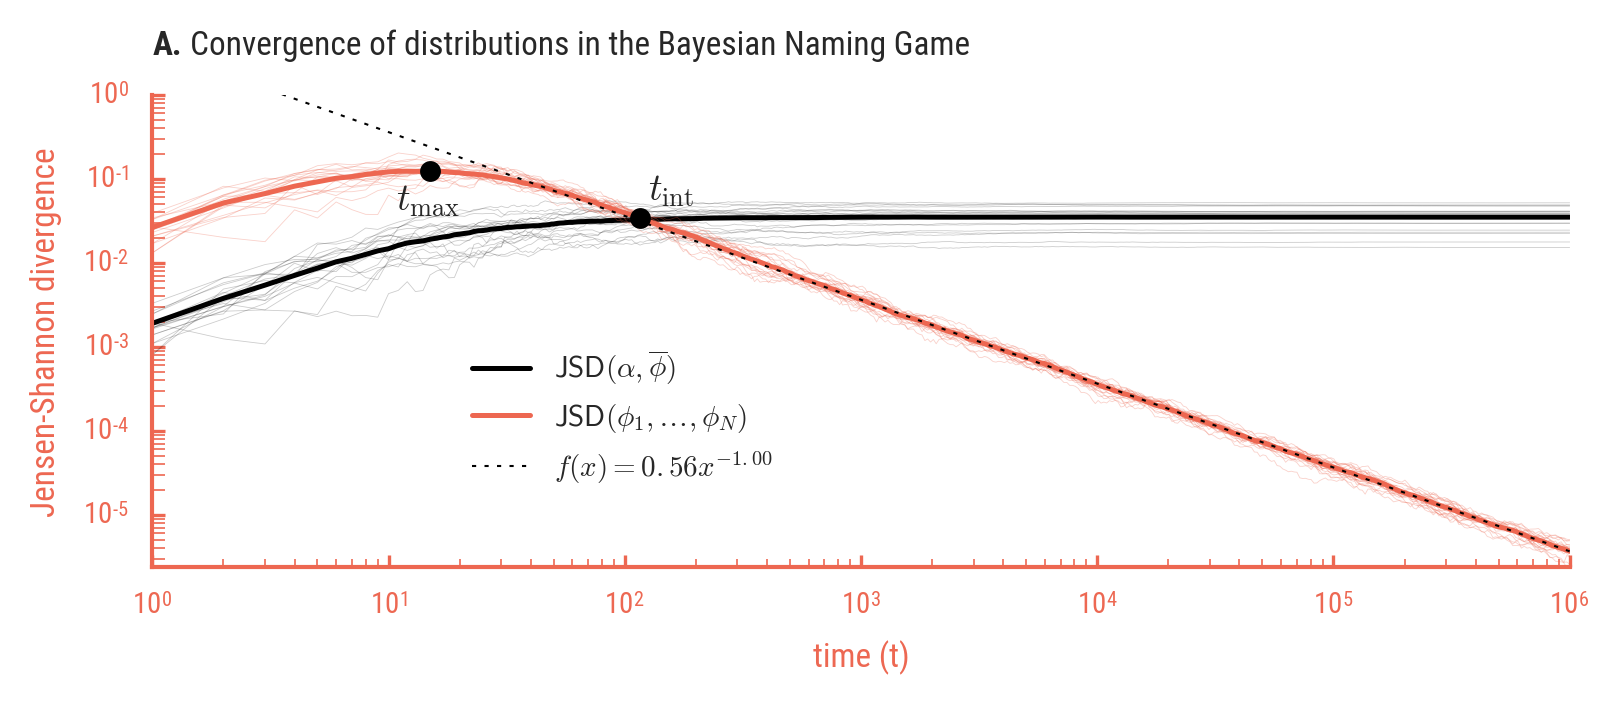

In [44]:
# plot 
figure(figsize=cm2inch(12,4))
runs = 20
xs = results['xs']

l, = pyplot.loglog(xs, results['alpha_mean_theta'].mean(axis=0), lw=1.2,
              label=r'$\mathsf{JSD}(\alpha, \overline{\phi})$')
pyplot.loglog(xs, results['alpha_mean_theta'][:runs,:].T, color=l.get_color(),
              lw=0.2, alpha=.2);

# l, = pyplot.loglog(xs, results['alpha_thetas'].mean(axis=0), lw=1.2,
#               label=r'$\mathsf{JSD}(\alpha, \phi_1, \dots, \phi_N)$')
# pyplot.loglog(xs, results['alpha_thetas'][:runs,:].T, color=l.get_color(),
#               lw=0.2, alpha=.25);

l, = pyplot.loglog(xs, results['thetas'].mean(axis=0), lw=1.2,
              label=r'$\mathsf{JSD}(\phi_1, \dots, \phi_N)$')
pyplot.loglog(xs, results['thetas'][:runs,:].T, color=l.get_color(),
              lw=0.2, alpha=.3);

# Linear regression line
start = 200
res = linregress(log10(xs[start:]), log10(results['thetas'].mean(axis=0))[start:])
pyplot.loglog(xs, xs**res.slope * 10**res.intercept, 'k', dashes=(1,2), lw=.5,
              label=r'$f(x) = {a:.2f}x^{{{k:.2f}}}$'.format(a=res.intercept, k=res.slope))

thetas = results['thetas']
alpha_th = results['alpha_mean_theta']
# Intersection
mthetas = thetas.mean(axis=0)
idx = np.argwhere(np.diff(np.sign(mthetas - alpha_th.mean(axis=0))) != 0).reshape(-1) + 0
x,y = xs[idx[0]], mthetas[idx[0]]
plot(x, y, 'ko', ms=5)
gca().annotate(r'$t_{\mathrm{int}}$', xy=(x,y),  xycoords='data',
            xytext=(x+10,y+0.01), textcoords='data',
            horizontalalignment='left', verticalalignment='bottom', fontsize=9)

# Maximum
x, y = xs[mthetas.argmax()], mthetas[mthetas.argmax()]
plot(x, y, 'ko', ms=5)
gca().annotate(r'$t_{\mathrm{max}}$', xy=(x,y),  xycoords='data',
            xytext=(x+5,y-.03), textcoords='data',
            horizontalalignment='right', verticalalignment='top',
              fontsize=9)


legend(bbox_to_anchor=(.45,.5))
xlabel('time (t)')
ylabel('Jensen-Shannon divergence')
title('Convergence of distributions in the Bayesian Naming Game')
restyle_title(gca())
sns.despine()
ylim(int(10e-7), 1)
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('BNG02-results.pdf', bbox_inches='tight')

## Convergence

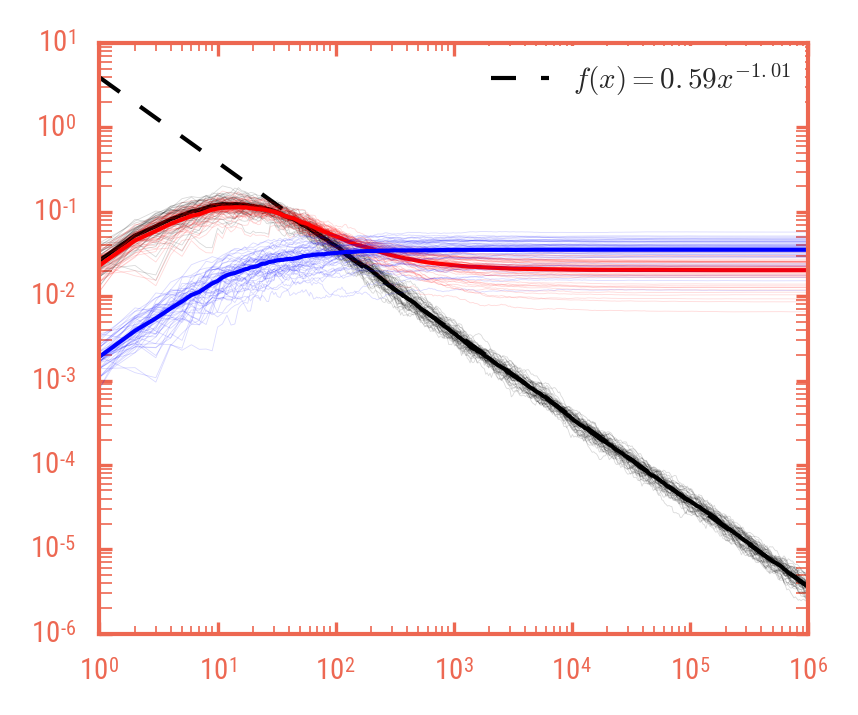

In [3]:
figure(figsize=cm2inch(6,5))
runs = 50
xs = results['xs']

pyplot.loglog(xs, results['thetas'][:runs,:].T, 'k', lw=0.2, alpha=.15);
pyplot.loglog(xs, results['thetas'][:runs,:].mean(axis=0), 'k', lw=1);

start = 60
res = linregress(log10(xs[start:]), log10(results['thetas'][:runs,:].mean(axis=0))[start:])
pyplot.loglog(xs, xs**res.slope * 10**res.intercept, '--', 
              label=r'$f(x) = {a:.2f}x^{{{k:.2f}}}$'.format(a=res.intercept, k=res.slope))


pyplot.loglog(xs, results['alpha_thetas'][:runs,:].T, 'r', lw=0.2, alpha=.15);
pyplot.loglog(xs, results['alpha_thetas'][:runs,:].mean(axis=0), 'r', lw=1);

pyplot.loglog(xs, results['alpha_mean_theta'][:runs,:].T, 'b', lw=0.2, alpha=.15);
pyplot.loglog(xs, results['alpha_mean_theta'][:runs,:].mean(axis=0), 'b', lw=1);

legend()

## Differences

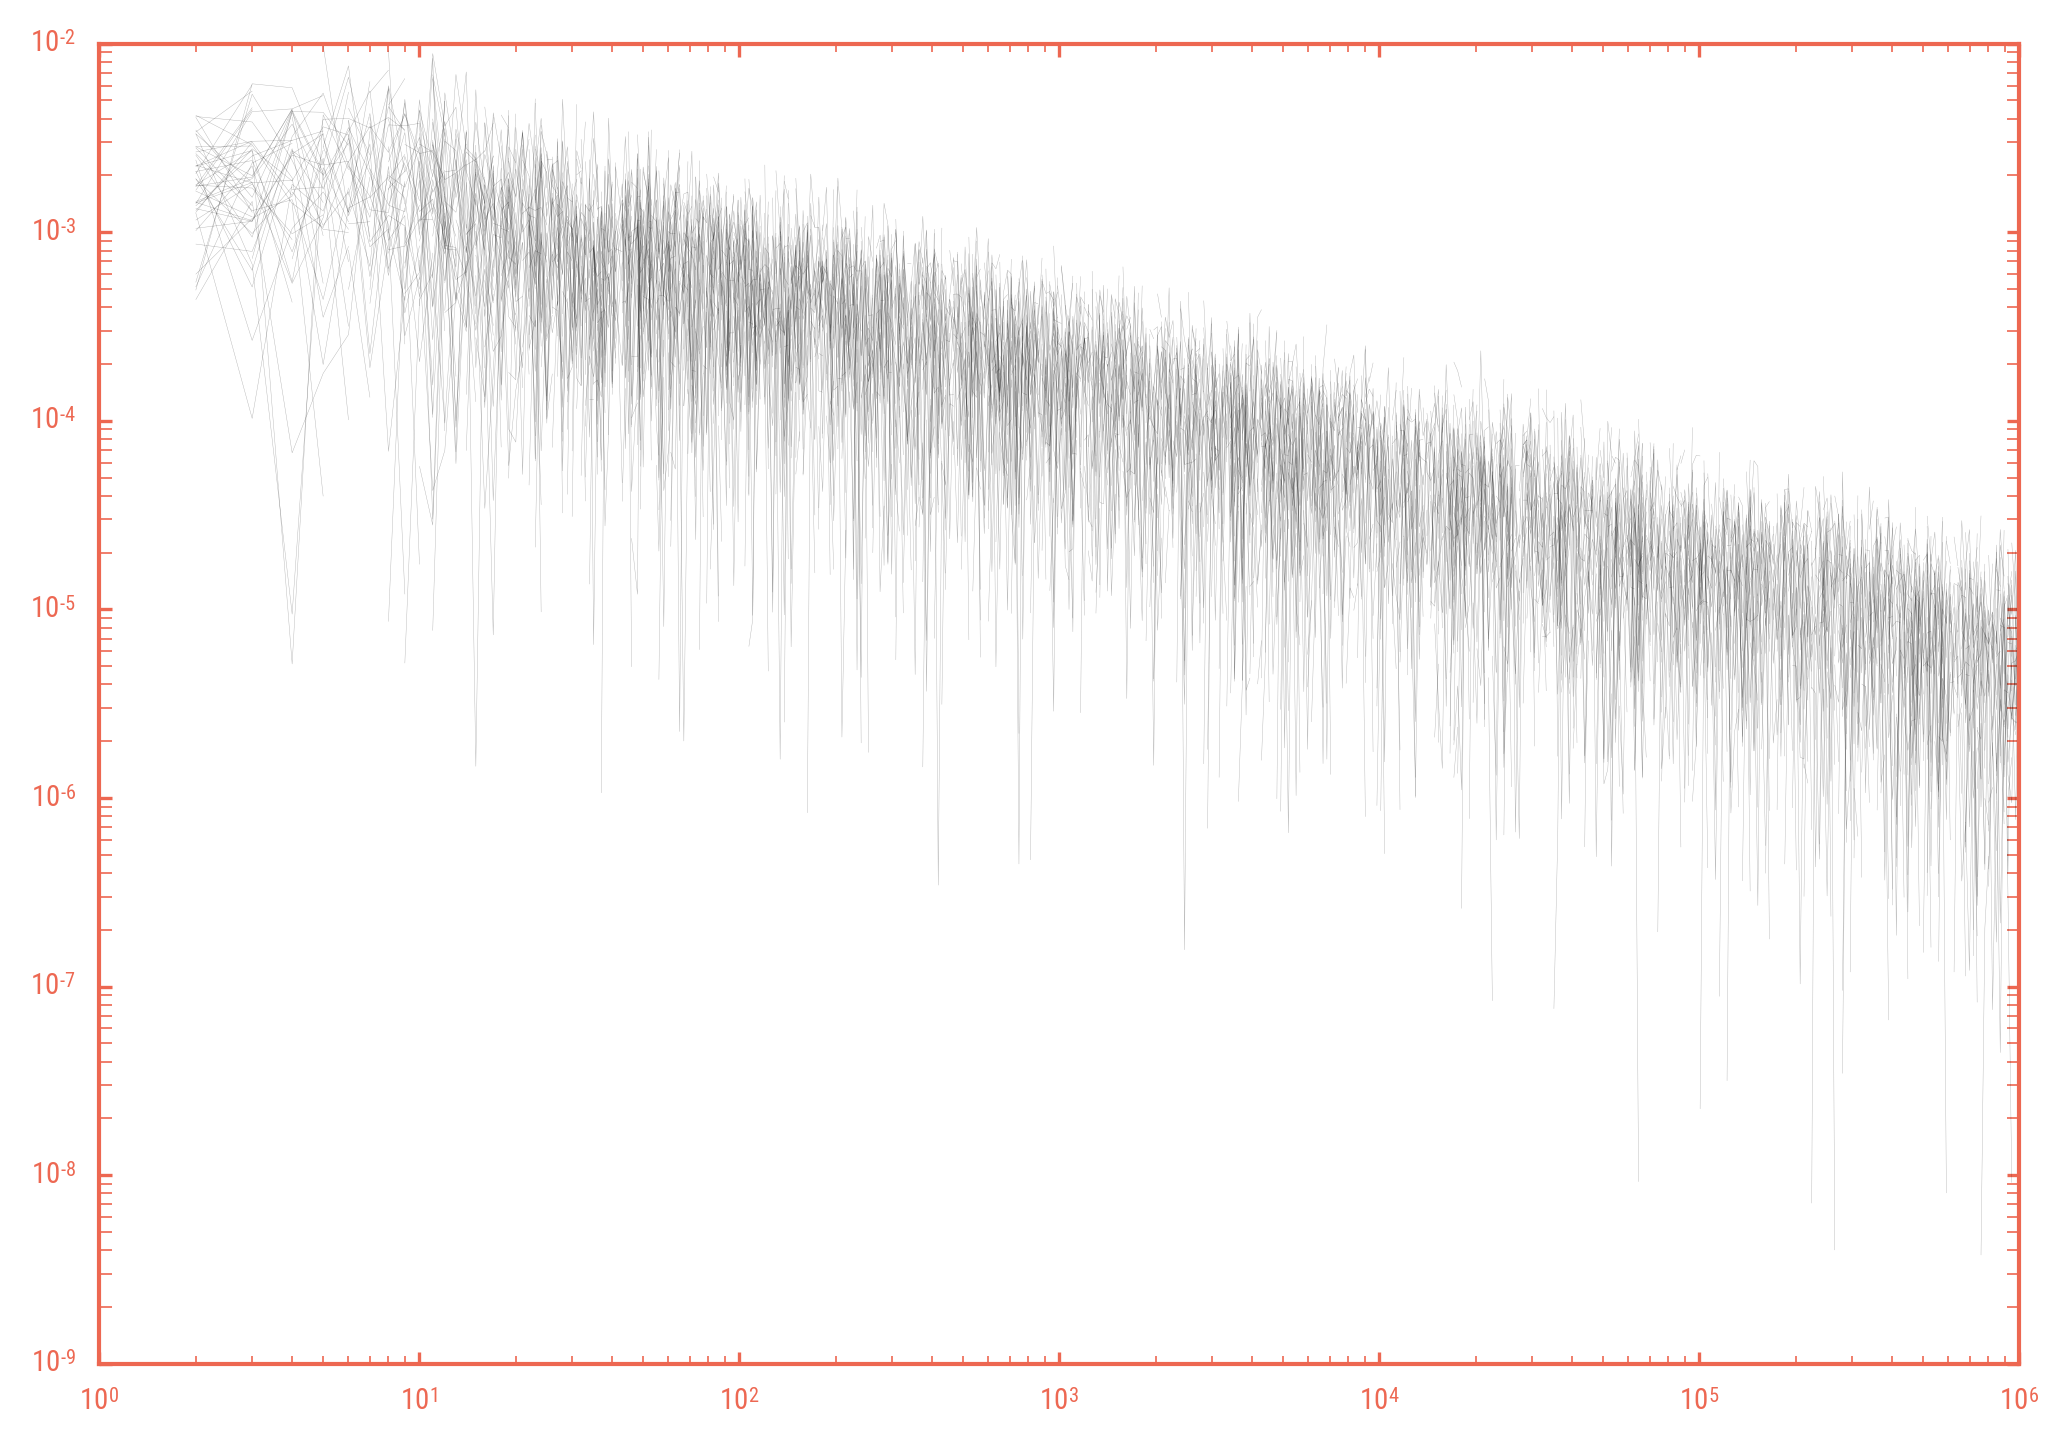

In [18]:
diffs = (results['alpha_mean_theta'][:,1:]-results['alpha_mean_theta'][:,:-1]).T
pyplot.loglog(xs[1:], diffs[:,:60], 'k', lw=.1, alpha=.3);
# pyplot.loglog(xs[1:], diffs.mean(axis=1), 'k', lw=2);

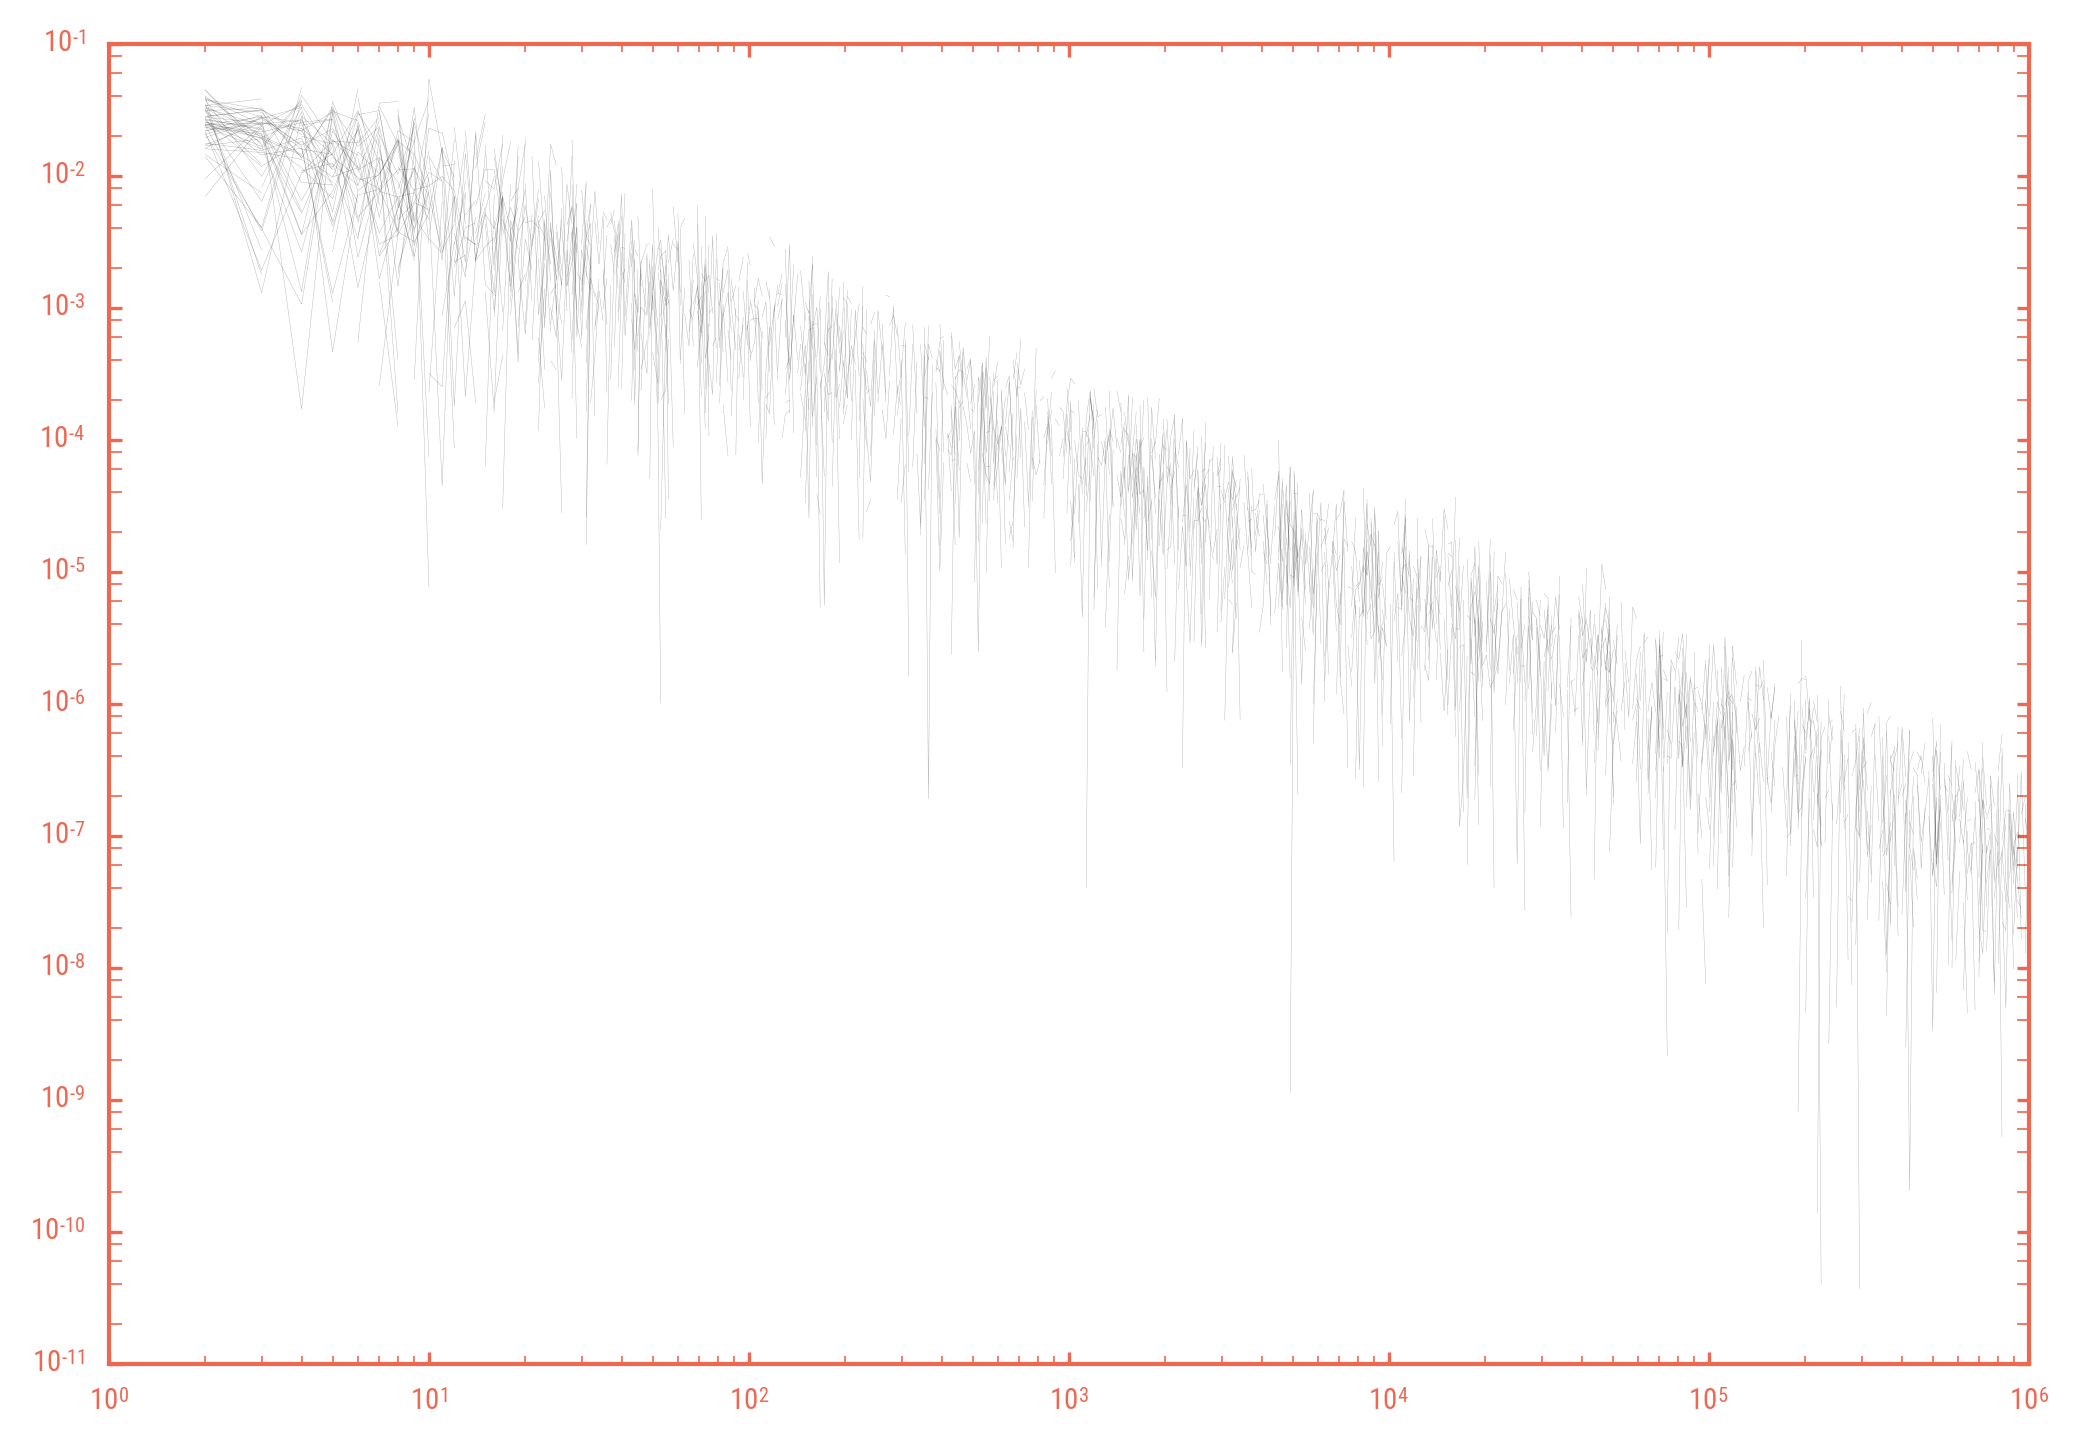

In [16]:
diffs = (results['thetas'][:,1:]-results['thetas'][:,:-1]).T
pyplot.loglog(xs[1:], diffs[:,:60], 'k', lw=.1, alpha=.3);
# pyplot.loglog(xs[1:], diffs.mean(axis=1), 'k', lw=2);